**COMPARISON OF MACHINE LEARNING ALGORITHMS FOR COVID-19 DATASET**

**Step 1: Importing Libraries and Datasets**
Here, we will we installing and inporting all the packages and libraries needed for our project

In [1]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 2.3 MB/s 
     |████████████████████████████████| 139 kB 38.1 MB/s 
     |████████████████████████████████| 193.6 MB 57 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=22cc96fa7fbc738e25bca342946f888fa4b1bf5ed611cc7a99faae26ab365e31
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [58]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
%matplotlib inline
plt.style.use('fivethirtyeight')

The mount drive command will load the dataset from the local drive if the dataset is already uploaded

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now, we will convert the data in Excel file into a dataframe as we have many python libraries to support its analysis

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Cleaned-Data.csv")
dataset = df.values

**Step 2: Data Description**

In [5]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [6]:
df.shape

(316800, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [8]:
df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

**Step 3: Data Preprocessing**

In [11]:
print("Number of values ​​that the Country characteristic takes ->")
df['Country'].unique()

Number of values ​​that the Country characteristic takes ->


array(['China', 'Italy', 'Iran', 'Republic of Korean', 'France', 'Spain',
       'Germany', 'UAE', 'Other-EUR', 'Other'], dtype=object)

We may think that this feature is not going to be the most important among the ones we have. Let's remove it from our dataset

In [12]:
df.drop("Country",axis=1,inplace=True)

In [13]:
df.head()


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0


**Step 4: Data Visualisation**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc35491be20>,
      dtype=object)

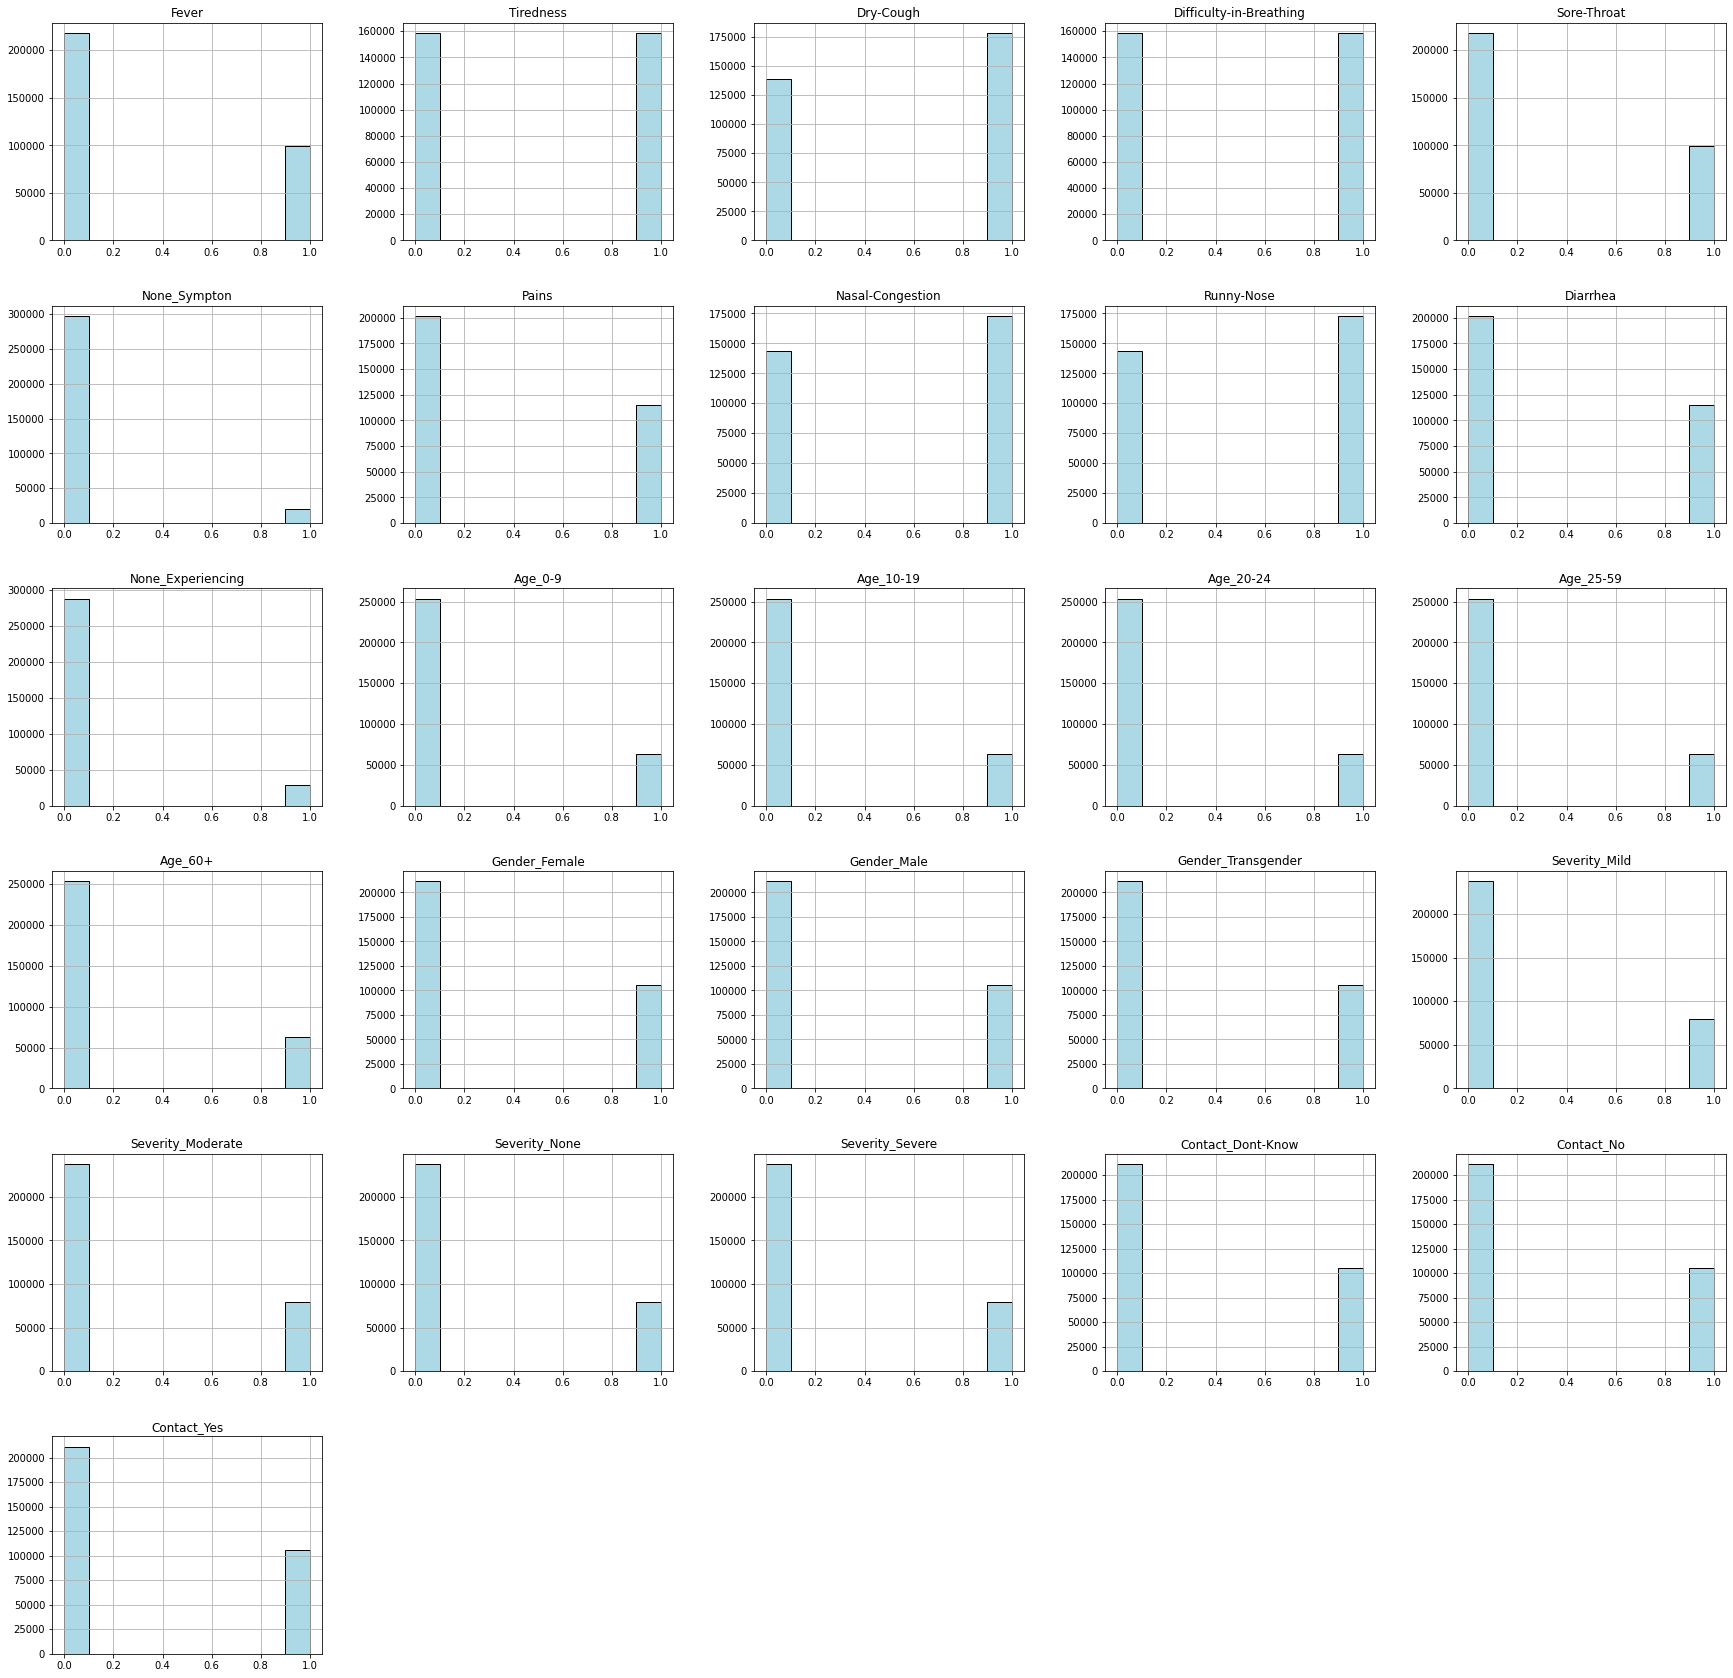

In [14]:
df.hist(figsize=(30,30), edgecolor='black', color='lightblue')

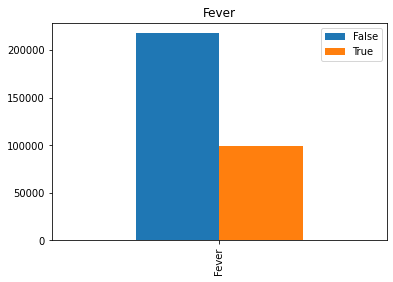

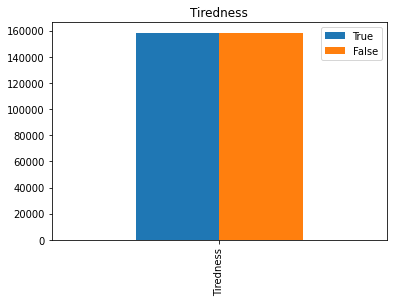

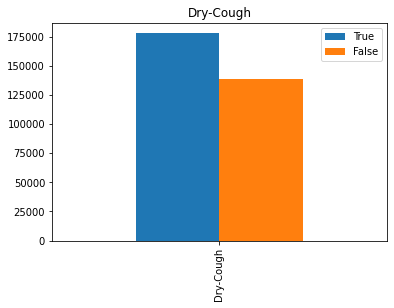

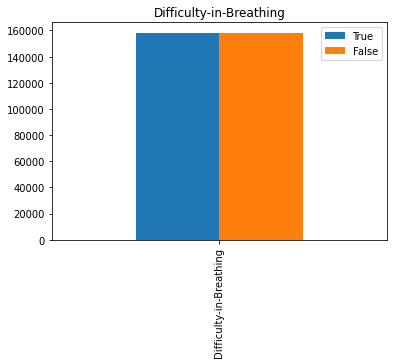

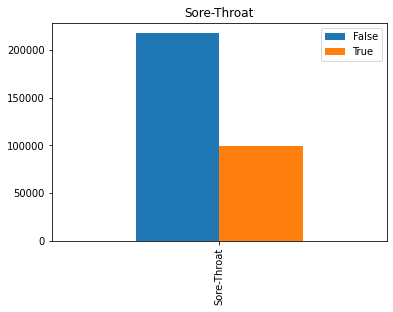

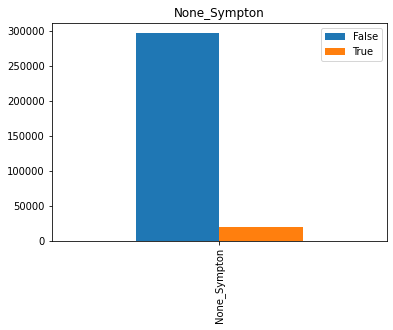

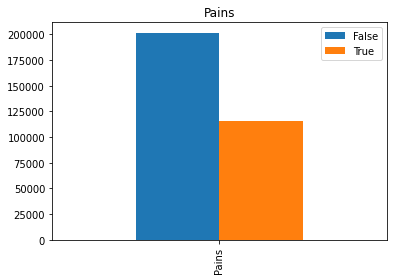

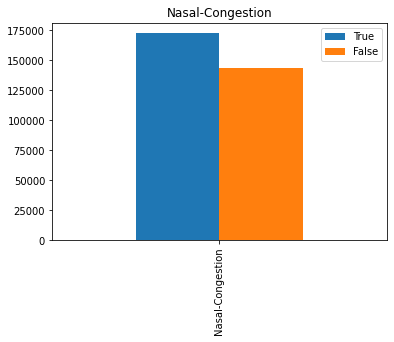

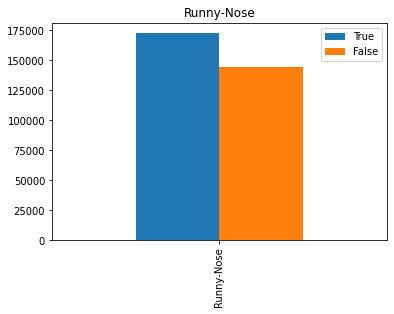

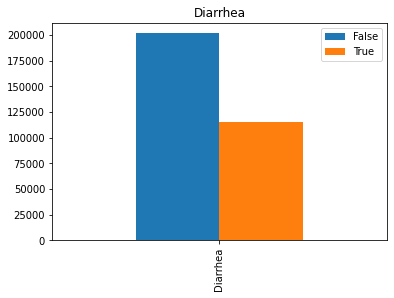

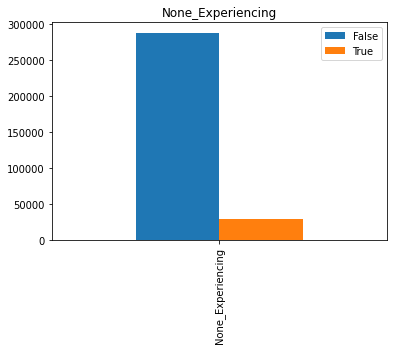

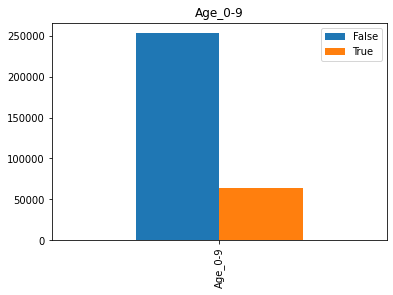

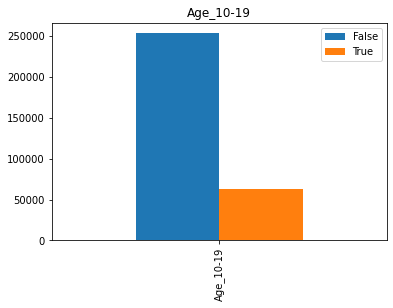

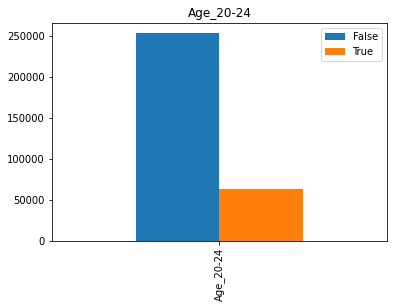

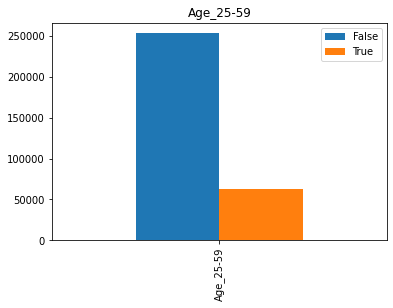

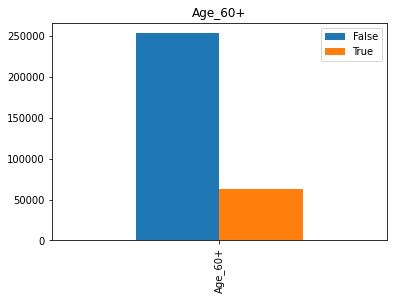

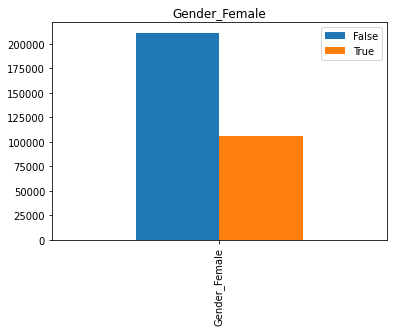

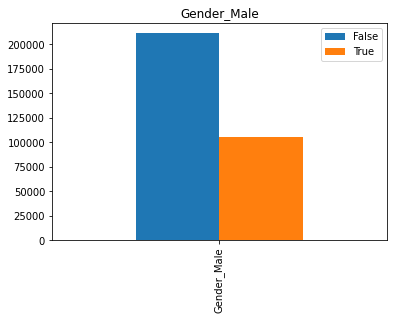

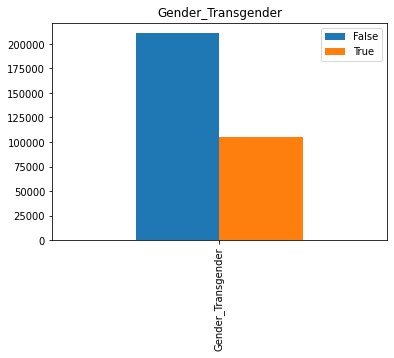

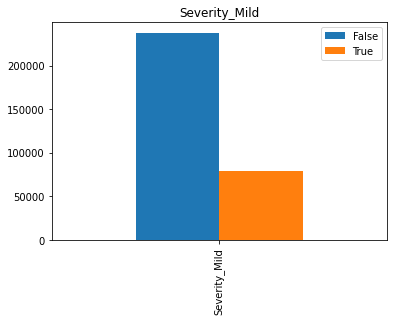

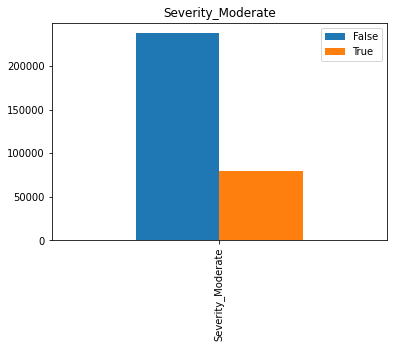

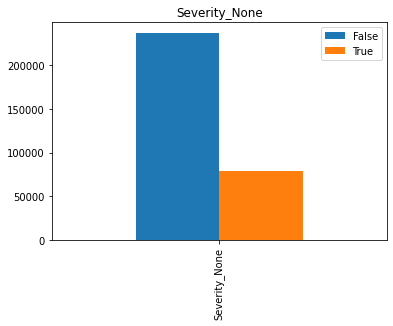

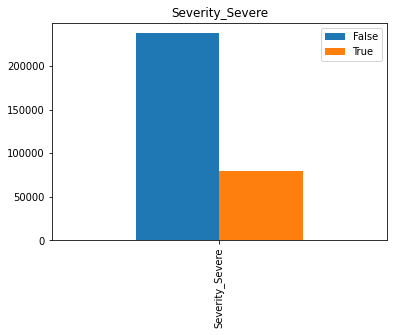

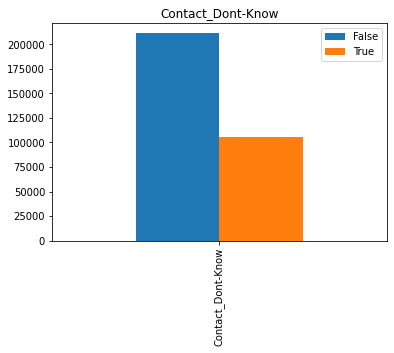

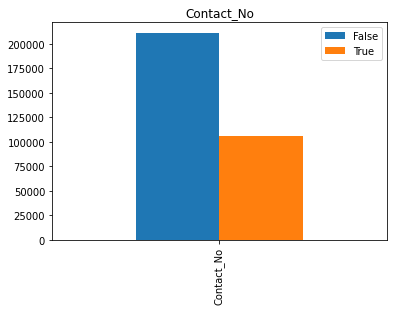

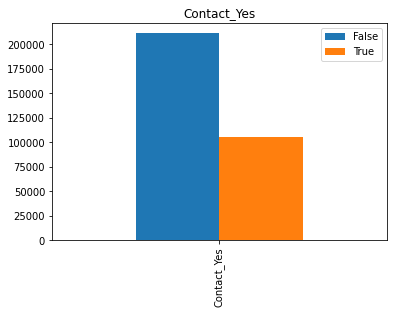

In [16]:
# bar graph to visualise the counts more efficciently as we have 27 columns
import matplotlib.pyplot as plt

for column in df:
    col1 = (df[column]==1).value_counts()
    df_plot  = pd.DataFrame([col1])
    df_plot.plot(kind='bar', title=column);
    plt.title(column)
    plt.show()

**Step 5: Exploratory Data Analysis(EDA)**

Now, we will make a filter to separate the severity:

Their values can only be in None, Mild, Moderate and Severe. The rest will be set to 'No'

In [20]:
severity_columns = df.filter(like='Severity_').columns


In [21]:
df['Severity_None'].replace({1:'None',0:'No'},inplace =True)
df['Severity_Mild'].replace({1:'Mild',0:'No'},inplace =True)
df['Severity_Moderate'].replace({1:'Moderate',0:'No'},inplace =True)
df['Severity_Severe'].replace({1:'Severe',0:'No'},inplace =True)

Here, we will apply previous conditions to all the columns that begin with Severity_ (filter)

In [22]:
df['Condition']=df[severity_columns].values.tolist()

In our dataframe, we can see that we have a new condition that specifies the categorical value of the severity

In [23]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,0,0,1,"[Mild, No, No, No]"
1,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,0,1,0,"[Mild, No, No, No]"
2,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,1,0,0,"[Mild, No, No, No]"
3,1,1,1,1,1,0,1,1,1,1,...,1,0,No,Moderate,No,No,0,0,1,"[No, Moderate, No, No]"
4,1,1,1,1,1,0,1,1,1,1,...,1,0,No,Moderate,No,No,0,1,0,"[No, Moderate, No, No]"


We still have to remove the added values ​​of 'No'. So we will create a function for this and apply it

In [24]:
def remove(listx):
    listx = set(listx) 
    listx.discard("No")
    final = ''.join(listx)
    return final

In [25]:
df['Condition'] = df['Condition'].apply(remove)

Finally, we are left with the severity value in the 'Condition' variable. What will be our output characteristic of the model

In [26]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,0,0,1,Mild
1,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,0,1,0,Mild
2,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,1,0,0,Mild
3,1,1,1,1,1,0,1,1,1,1,...,1,0,No,Moderate,No,No,0,0,1,Moderate
4,1,1,1,1,1,0,1,1,1,1,...,1,0,No,Moderate,No,No,0,1,0,Moderate


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


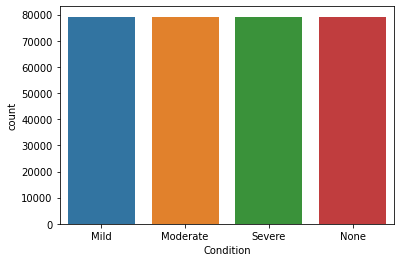

In [27]:
sns.countplot(df['Condition'])

Now we are going to carry out the same procedure to group characteristics into age, gender and type of contact.

In [28]:
age_columns = df.filter(like='Age_').columns
gender_columns = df.filter(like='Gender_').columns
contact_columns = df.filter(like='Contact_').columns

Now, we are going to create a category for age, another for gender and another for contact in which the severity is nil

No risk due to age, No gender risk, No risk due to the type of contact will contain values that have none severity

In [29]:
No_risk_age = df.groupby(['Severity_None'])[age_columns].sum()
No_risk_gender = df.groupby(['Severity_None'])[gender_columns].sum()
No_risk_contact = df.groupby(['Severity_None'])[contact_columns].sum()

We create another three to discern between Severity_Mild (mild severity):

With mild risk due to age, With mild risk by gender, With mild risk due to the type of contact will contain mild values

In [30]:
Low_risk_age = df.groupby(['Severity_Mild'])[age_columns].sum()
Low_risk_gender = df.groupby(['Severity_Mild'])[gender_columns].sum()
Low_risk_contact = df.groupby(['Severity_Mild'])[contact_columns].sum()

Separate between Severity_Moderate (moderate severity):

With moderate risk due to age, with moderate risk due to gender, With moderate risk due to the type of contact will contain moderate values

In [31]:
Moderate_risk_age = df.groupby(['Severity_Moderate'])[age_columns].sum()
Moderate_risk_gender = df.groupby(['Severity_Moderate'])[gender_columns].sum()
Moderate_risk_contact = df.groupby(['Severity_Moderate'])[contact_columns].sum()

Separate between Severity_Severe (severe severity):

With severe risk due to age, with severe risk due to gender, With severe risk due to the type of contact will contain all the severe values

In [32]:
Severe_risk_age = df.groupby(['Severity_Severe'])[age_columns].sum()
Severe_risk_gender = df.groupby(['Severity_Severe'])[gender_columns].sum()
Severe_risk_contact = df.groupby(['Severity_Severe'])[contact_columns].sum()
 

As the important Condition with values ​​None, Mild, Moderate and Severe we already have it stored in a single output variable; we are going to delete the following 4 columns that we do not need:

Severity_Mild 
Severity_None 
Severity_Moderate 
Severity_Severe

In [33]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,0,0,1,Mild
1,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,0,1,0,Mild
2,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,1,0,0,Mild
3,1,1,1,1,1,0,1,1,1,1,...,1,0,No,Moderate,No,No,0,0,1,Moderate
4,1,1,1,1,1,0,1,1,1,1,...,1,0,No,Moderate,No,No,0,1,0,Moderate


In [34]:
df.drop(severity_columns,axis=1,inplace=True)

In the data preprocessing we have already removed several columns. Now we are going to transform the categorical variable (Mild,None, Moderate and Severe) with the LabelEncoder library into a numeric variable

In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])

It will take the value 0,1,2,3

0-None 1-Mild 2-Moderate 3-Severe

In [36]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,0
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,1
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,3
316796,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,3
316797,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,2
316798,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,2


Lastly, we are going to look at the correlation between features with a heatmap.

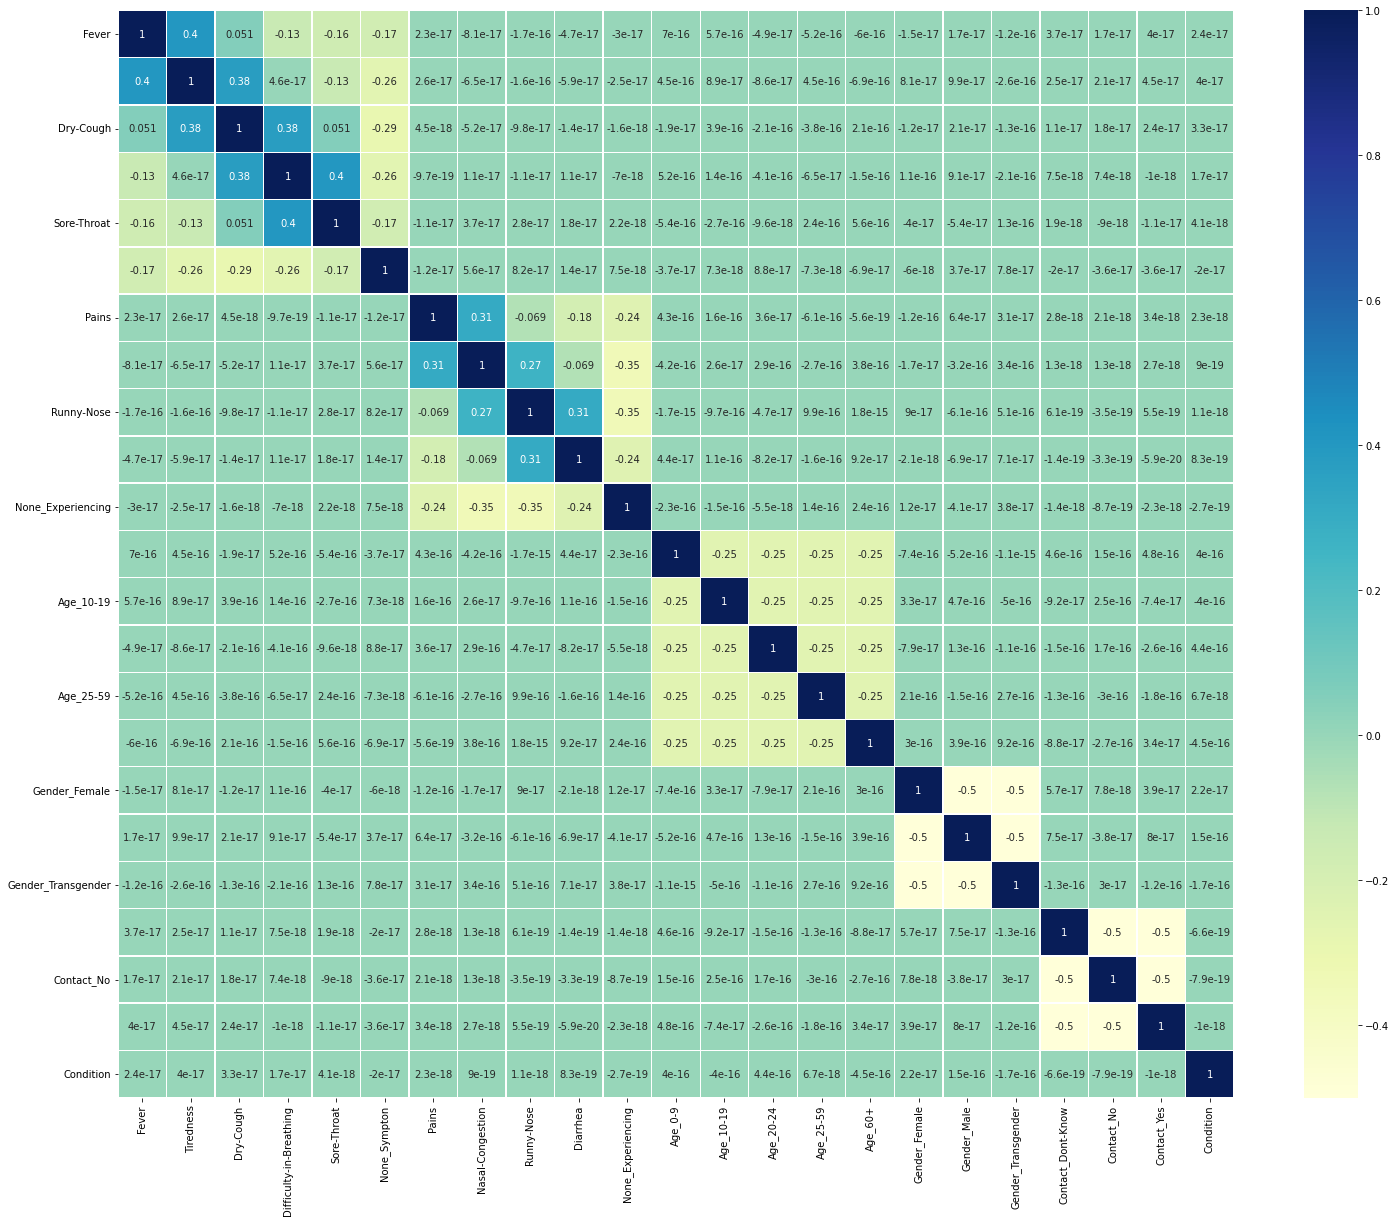

In [37]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidths=0.4) 
fig=plt.gcf()
fig.set_size_inches(25,20)
plt.show()

In the set of input features, we now need to remove the output tag. We also remove other columns that we believe are not necessary.

The output label is stored in the variable y

In [38]:
X= df.drop(['Condition', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes' ],axis=1)
y= df['Condition']

We divide the data set into test and training

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
#checking the shape of train and test sets
print("Shape of X_train",X_train.shape)
print("Shape of Y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of Y_est", y_test.shape)

Shape of X_train (221760, 11)
Shape of Y_train (221760,)
Shape of X_test (95040, 11)
Shape of Y_est (95040,)


**Step 6: Model Building**

**Logical Regression Model**

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [42]:
#Predicting values using test set

Y_pred_logreg = logreg.predict(X_test)

In [43]:
#predicting accuracy score of logistic regression model

from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
print("Logistic Regression: " + str(accuracy_logreg * 100))

Logistic Regression: 24.604377104377104


**K nearest neighbours Model**

In [44]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

**Decision Tree Model**

In [49]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy')
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

**Random Forest Algorithm**

In [50]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [51]:
# Making predictions on test dataset for all the algorithms used above
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

**Step 7 part a: Model Evaluation for Logistic, KNN, Decision Tree and Random Forest**

In [52]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

In [53]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 24.604377104377104
K Nearest neighbors: 24.813762626262626
Decision tree: 23.203914141414142
Random Forest: 23.464856902356903


In [54]:
import tensorflow

**Neural Network**

In [56]:
#Normalizing the data

nl = Normalizer()
nl.fit(X_train)
X_train = nl.transform(X_train)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)
X_dev = nl.transform(X_dev)
X_test = nl.transform(X_test)

In [57]:
#Defining layers of the Neural Network

def nn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(128, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(128, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(128, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [60]:
#To visualise the layers that we have added

model = nn()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 11)]              0         
                                                                 
 FC1 (Dense)                 (None, 128)               1536      
                                                                 
 BC1 (BatchNormalization)    (None, 128)               512       
                                                                 
 Activation1 (Activation)    (None, 128)               0         
                                                                 
 Dropout1 (Dropout)          (None, 128)               0         
                                                                 
 FC2 (Dense)                 (None, 128)               16512     
                                                                 
 BC2 (BatchNormalization)    (None, 128)               512 

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=20, min_delta=0.0001)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_dev, y_dev), verbose=0)

In [ ]:
#To print accuracy and classification report for Neural Network

x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = model.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    elif i == 1:
        print('Dev set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))

6930/6930 [==============================] - 11s 2ms/step
Training set:


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	Accuracy:0.250
	Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     55304
           1       0.25      1.00      0.40     55402
           2       0.00      0.00      0.00     55531
           3       0.00      0.00      0.00     55523

    accuracy                           0.25    221760
   macro avg       0.06      0.25      0.10    221760
weighted avg       0.06      0.25      0.10    221760

 103/1485 [=>............................] - ETA: 2s

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1485/1485 [==============================] - 2s 2ms/step
Dev set:
	Accuracy:0.254
	Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11968
           1       0.25      1.00      0.40     12048
           2       0.00      0.00      0.00     11714
           3       0.00      0.00      0.00     11790

    accuracy                           0.25     47520
   macro avg       0.06      0.25      0.10     47520
weighted avg       0.06      0.25      0.10     47520

  69/1485 [>.............................] - ETA: 2s

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1485/1485 [==============================] - 2s 2ms/step
Test set:
	Accuracy:0.247
	Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11928
           1       0.25      1.00      0.40     11750
           2       0.00      0.00      0.00     11955
           3       0.00      0.00      0.00     11887

    accuracy                           0.25     47520
   macro avg       0.06      0.25      0.10     47520
weighted avg       0.06      0.25      0.10     47520



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True) 

                # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                      props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
            print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [ ]:
df, NAlist = reduce_mem_usage(df)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 55.5909423828125  MB
******************************
Column:  Fever
dtype before:  int64
dtype after:  uint8
******************************
___MEMORY USAGE AFTER COMPLETION:___
******************************
Column:  Tiredness
dtype before:  int64
dtype after:  uint8
******************************
___MEMORY USAGE AFTER COMPLETION:___
******************************
Column:  Dry-Cough
dtype before:  int64
dtype after:  uint8
******************************
___MEMORY USAGE AFTER COMPLETION:___
******************************
Column:  Difficulty-in-Breathing
dtype before:  int64
dtype after:  uint8
******************************
___MEMORY USAGE AFTER COMPLETION:___
******************************
Column:  Sore-Throat
dtype before:  int64
dtype after:  uint8
******************************
___MEMORY USAGE AFTER COMPLETION:___
******************************
Column:  None_Sympton
dtype before:  int64
dtype after:  uint8
******************************
___ME

**Step 7 part b : Model Evaluation using Tpot **

In [ ]:
from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 5, population_size= 50,
                                 verbosity= 2,
                                 n_jobs = -1 , random_state = 1 , early_stop = 12,
                                 cv = 5, scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.2509604978354979

Generation 2 - Current best internal CV score: 0.2509604978354979

Generation 3 - Current best internal CV score: 0.25129419191919194

Generation 4 - Current best internal CV score: 0.2513798701298701

Generation 5 - Current best internal CV score: 0.2513798701298701

Best pipeline: SGDClassifier(BernoulliNB(input_matrix, alpha=0.001, fit_prior=False), alpha=0.0, eta0=1.0, fit_intercept=True, l1_ratio=0.0, learning_rate=constant, loss=log, penalty=elasticnet, power_t=0.0)


TPOTClassifier(early_stop=12, generations=5, n_jobs=-1, population_size=50,
               random_state=1, scoring='accuracy', verbosity=2)

In [ ]:
#To print the accuracy for tpot classifier

accuracy = tpot_classifier.score(X_test,y_test)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


0.2512521043771044


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


In [ ]:
print(accuracy)

0.2512521043771044


print(accuracy)